In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle(r'data.pickle')
df= pd.DataFrame(df) 

In [3]:
df.head()

,id,question,answer,labeller,emo_class,seven_emo,intent,topic,keyword_vec,similarity,reviewed,created_at,updated_at,url
0,1,ชิว,ก็ดีแล้ว นอนชิว นั่งชิว ขนาดกินยังชิว :),None,pos_de,relaxed,chitchat,general,"0.6564798951148987,-1.8736761808395386,0.49881...",1.0,True,2019-06-03T13:52:59.000+07:00,2019-08-04T08:03:10.000+07:00,http://chitchat.tunejai.com/chats/1.json
1,2,ไม่นอนในเวลางานสิ,ของีบนิดนึงไม่ได้หรอ,None,neu,neutral,chitchat,general,"0.5782301053404808,0.3987545693914096,0.271282...",1.0,True,2019-06-03T13:52:59.000+07:00,2019-08-04T08:04:00.000+07:00,http://chitchat.tunejai.com/chats/2.json
2,3,อืมา,🙂,None,neu,neutral,chitchat,general,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",1.0,True,2019-06-03T13:52:59.000+07:00,2019-08-04T08:04:23.000+07:00,http://chitchat.tunejai.com/chats/3.json
3,4,หยิบยังไงอะ,เอามือหยิบสิ,None,neu,neutral,chitchat,general,"0.038666918873786926,-0.18005990283563733,-0.1...",1.0,True,2019-06-03T13:52:59.000+07:00,2019-08-04T08:04:50.000+07:00,http://chitchat.tunejai.com/chats/4.json
4,5,ระหว่าง sumsung กับ iphone ใช้อะไรดี,เธอว่าไงก็ว่างั้นละ มันแล้วแต่คนชอบ,None,neu,neutral,question,general,"0.3020523651079698,0.10027491030367938,-0.2324...",1.0,True,2019-06-03T13:52:59.000+07:00,2019-08-04T08:05:24.000+07:00,http://chitchat.tunejai.com/chats/5.json


In [4]:
df["seven_emo"].unique() 

array(['relaxed', 'neutral', 'bored', 'angry', 'happy', 'depressed',
       'stressed', None], dtype=object)

In [5]:
df = df[df['seven_emo'].notna()]

In [6]:
df["seven_emo"].unique() 

array(['relaxed', 'neutral', 'bored', 'angry', 'happy', 'depressed',
       'stressed'], dtype=object)

In [7]:
data = df[['seven_emo','question']]

In [8]:
data['question']

0                                         ชิว
1                           ไม่นอนในเวลางานสิ
2                                        อืมา
3                                 หยิบยังไงอะ
4        ระหว่าง sumsung กับ iphone ใช้อะไรดี
                         ...                 
26848                ไม่ หมายถึงจับใจน่ะไปนอน
26849                            วันนี้เด๋อนะ
26850                           แยกย้ายนะ บาย
26851                    เราโง่ขนาดนั้นเลยหรอ
26852                        ใช่บอทน้อยรึป่าว
Name: question, Length: 26779, dtype: object

E:\anaconda_python\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\anaconda_python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


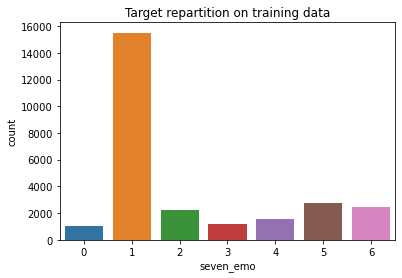

In [9]:
count=0
for i in df["seven_emo"].unique():
    data.loc[data['seven_emo']==i,"seven_emo"] = count
    count+=1
sns.countplot(data['seven_emo'])
plt.title('Target repartition on training data')
plt.show()




In [10]:
data

,seven_emo,question
0,0,ชิว
1,1,ไม่นอนในเวลางานสิ
2,1,อืมา
3,1,หยิบยังไงอะ
4,1,ระหว่าง sumsung กับ iphone ใช้อะไรดี
...,...,...
26848,1,ไม่ หมายถึงจับใจน่ะไปนอน
26849,1,วันนี้เด๋อนะ
26850,1,แยกย้ายนะ บาย
26851,5,เราโง่ขนาดนั้นเลยหรอ


In [11]:
data['seven_emo'].value_counts()[1]

15503

In [12]:
count_least = min(data['seven_emo'].value_counts()[0],
                  data['seven_emo'].value_counts()[1],
                  data['seven_emo'].value_counts()[2],
                  data['seven_emo'].value_counts()[3],
                  data['seven_emo'].value_counts()[4],
                  data['seven_emo'].value_counts()[5],
                  data['seven_emo'].value_counts()[6],)
                
print(count_least)

1028


In [13]:
df_train_types = []
for toxic_type in ['severe_toxic']:
    df_class_0 = data[data['seven_emo'] == 0]
    df_class_1 = data[data['seven_emo'] == 1]
    df_class_2 = data[data['seven_emo'] == 2]
    df_class_3 = data[data['seven_emo'] == 3]
    df_class_4 = data[data['seven_emo'] == 4]
    df_class_5 = data[data['seven_emo'] == 5]
    df_class_6 = data[data['seven_emo'] == 6]

    df_class_0_under = df_class_0.sample(count_least)
    df_class_1_under = df_class_1.sample(count_least)
    df_class_2_under = df_class_2.sample(count_least)
    df_class_3_under = df_class_3.sample(count_least)
    df_class_4_under = df_class_4.sample(count_least)
    df_class_5_under = df_class_5.sample(count_least)
    df_class_6_under = df_class_6.sample(count_least)
    
    df_train_types.append(df_class_0_under)
    df_train_types.append(df_class_1_under)
    df_train_types.append(df_class_2_under)
    df_train_types.append(df_class_3_under)
    df_train_types.append(df_class_4_under)
    df_train_types.append(df_class_5_under)
    df_train_types.append(df_class_6_under)
    
        
df_train_under = pd.concat(df_train_types, axis=0,ignore_index=True)
print(df_train_under.shape)

(7196, 2)


In [27]:
df_train_under

,seven_emo,question
0,0,เหนื่ื่อยๆงี้มันก็ต้องพักก
1,0,ไม่ต้องคอยเถียงกับใครโคตรสบายเลย
2,0,เรียนต่อแล้วไม่ต้องรบกวนที่บ้านได้ก็ดีแล้ว
3,0,ความกัังวลเรื่องเค้าไม่ค่อยมีผลกับเราแล้วนะ
4,0,การบ้านอย่างง่าย
...,...,...
7191,6,อยากไปเที่ยวแต่ไม่มีเงินเลย
7192,6,มันจะเป็นยังไงต่อไปนะ
7193,6,พักแร้วปัญหาจะไม่มีหรอ
7194,6,มันไม่ได้ผล


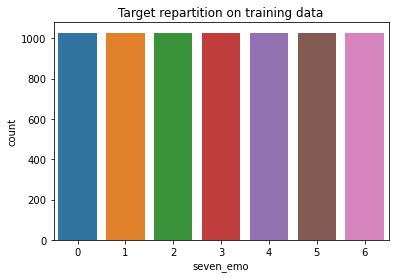

In [14]:
sns.countplot(df_train_under['seven_emo'])
plt.title('Target repartition on training data')
plt.show()

In [15]:
from pythainlp.tokenize import word_tokenize
from pythainlp.tag import pos_tag
from pythainlp.tag.named_entity import ThaiNameTagger
from pythainlp.corpus import thai_stopwords
from stop_words import get_stop_words

In [16]:
text = df_train_under['question']
text = str(text)
text=text.replace('Name: question, dtype: object', '')
text

'0                              เหนื่ื่อยๆงี้มันก็ต้องพักก\n1                        ไม่ต้องคอยเถียงกับใครโคตรสบายเลย\n2              เรียนต่อแล้วไม่ต้องรบกวนที่บ้านได้ก็ดีแล้ว\n3             ความกัังวลเรื่องเค้าไม่ค่อยมีผลกับเราแล้วนะ\n4                                        การบ้านอย่างง่าย\n                              ...                        \n7191                          อยากไปเที่ยวแต่ไม่มีเงินเลย\n7192                                มันจะเป็นยังไงต่อไปนะ\n7193                               พักแร้วปัญหาจะไม่มีหรอ\n7194                                          มันไม่ได้ผล\n7195    วันนี้ไปดูตามร้านเฟอร์นิเจอร์ เพลียมาก เพราะเข...\nName: question, Length: 7196, dtype: object'

In [17]:
unique_words_in_corpus = set() 
count=0
def unique_word(d):
    global count
    global textlist
    global textlist
  
    th_stop = tuple(thai_stopwords())
    en_stop = tuple(get_stop_words('en'))
    #p_stemmer = PorterStemmer()
    text = word_tokenize(d, engine='newmm',keep_whitespace=False)

    textlist.append(text)

    for word in text:
        if word not in unique_words_in_corpus:
            unique_words_in_corpus.add(word)

In [18]:
textlist=[]
for i in df_train_under['question']:
    i = str(i)
    i=i.replace('Name: question, dtype: object', '')
    unique_word(i)

In [19]:
print(len(unique_words_in_corpus))
print(type(unique_words_in_corpus))

4162
<class 'set'>


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
tokens_list_j = [','.join(tkn) for tkn in textlist]
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
c_feat = cvec.fit_transform(tokens_list_j)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(analyzer=lambda x:x.split(','),)
t_feat = tvec.fit_transform(tokens_list_j)

In [22]:
len_vocab=len(tvec.vocabulary_)

In [23]:
t_feat=t_feat[:,:len_vocab].todense()

In [24]:
data = pd.DataFrame(t_feat)

In [25]:
data

,0,1,2,3,4,5,6,7,8,9,...,4152,4153,4154,4155,4156,4157,4158,4159,4160,4161
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_train_under['seven_emo']

0       0
1       0
2       0
3       0
4       0
       ..
7191    6
7192    6
7193    6
7194    6
7195    6
Name: seven_emo, Length: 7196, dtype: object

In [29]:
data=pd.concat([df_train_under['seven_emo'], data], axis=1)

In [30]:
data

,seven_emo,0,1,2,3,4,5,6,7,8,...,4152,4153,4154,4155,4156,4157,4158,4159,4160,4161
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7191,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7192,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7193,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7194,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from sklearn.model_selection import train_test_split
X = data.drop('seven_emo',axis=1)
y = data['seven_emo']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [48]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [51]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [54]:
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.5527777777777778
Accuracy Polynomial Kernel: 0.5340277777777778
Accuracy Radial Basis Kernel: 0.5583333333333333
Accuracy Sigmoid Kernel: 0.5430555555555555


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [61]:
# Instantiate learning model (k = number)
classifier = KNeighborsClassifier(n_neighbors=1)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 41.32 %.


In [63]:
from playsound import playsound
playsound('audio.mp3')